In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5

/content/drive/.shortcut-targets-by-id/1xGpwFZWnMwZbUXGO12RnmerSUHUra6SN/INtern/Project/cardamageidentification/dmg_yolov5


In [3]:
!ls

'=1.9.0'  'สำเนาของ Car_Model_Honda_Train.ipynb'   dmg_yolov5.ipynb   yolov5
'=4.1'	  'csv dmg detect noDmg.ipynb'		   test_sp


#Install Dependencies

_(Remember to choose GPU in Runtime if not already selected. Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)_

In [4]:
%cd /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5
!git clone https://github.com/ultralytics/yolov5  # clone repo

/content/drive/.shortcut-targets-by-id/1xGpwFZWnMwZbUXGO12RnmerSUHUra6SN/INtern/Project/cardamageidentification/dmg_yolov5
fatal: destination path 'yolov5' already exists and is not an empty directory.


In [5]:
%cd /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5/yolov5
# !git fetch&git pull

%pip install -qr requirements.txt  # install dependencies
#%pip uninstall -y wandb 

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))


Setup complete. Using torch 1.11.0+cu113 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


# Create file dataset.yaml


In [6]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [7]:
%%writetemplate /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5/yolov5/data/images/data.yaml
# train and val data as 1) directory: path/images/, 2) file: path/images.txt, or 3) list: [path1/images/, path2/images/]
train: /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5/yolov5/data/images/train
val: /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5/yolov5/data/images/valid
test: /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5/yolov5/data/images/test

# Classes
nc: 2 #number of class will equal number of names
names: ['damage','noDamage']

In [8]:
%cat /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5/yolov5/data/images/data.yaml

# train and val data as 1) directory: path/images/, 2) file: path/images.txt, or 3) list: [path1/images/, path2/images/]
train: /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5/yolov5/data/images/train
val: /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5/yolov5/data/images/valid
test: /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5/yolov5/data/images/test

# Classes
nc: 2 #number of class will equal number of names
names: ['damage','noDamage']

In [9]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.3 MB/s 
     |████████████████████████████████| 181 kB 59.3 MB/s 
     |████████████████████████████████| 145 kB 58.4 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=6d88f4e522cc5fc588d2b029f4f283d151bc72f42751401b679037fd80ac1748
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


# **Train**

### Model Small YOLOv5s
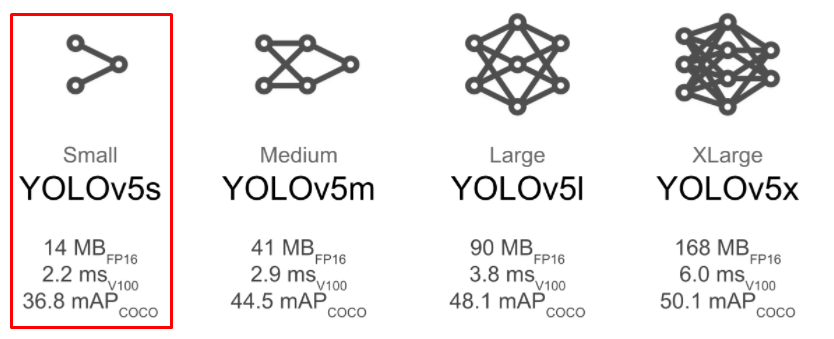

In [10]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [11]:
%cat /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5/yolov5/data/images/data.yaml

# train and val data as 1) directory: path/images/, 2) file: path/images.txt, or 3) list: [path1/images/, path2/images/]
train: /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5/yolov5/data/images/train
val: /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5/yolov5/data/images/valid
test: /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5/yolov5/data/images/test

# Classes
nc: 2 #number of class will equal number of names
names: ['damage','noDamage']

In [ ]:
%cd /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5/yolov5

# !python train.py --img 640  --epochs 3 --data ./data/ford/everest/evrest.yaml --weights yolov5s.pt --name result_s
#epoch 150, train class = 10, test = 5-6
!python train.py --img 640 --batch 16 --epochs 100 --data /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5ject/cardamageidentification/dmg_yolov5/yolov5/data/images/data.yaml --weights yolov5s.pt --name result_dmg

/content/drive/MyDrive/dmg_yolov5/yolov5
wandb: Currently logged in as: prppst. Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/dmg_yolov5/yolov5/data/images/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=result_dmg, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 1 commit. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.1-177-gd059d1d torch 1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01

In [13]:
%cd /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5/yolov5

# !python train.py --img 640  --epochs 3 --data ./data/ford/everest/evrest.yaml --weights yolov5s.pt --name result_s
#epoch 150, train class = 10, test = 5-6
!python train.py --img 640 --batch 16 --epochs 300 --data /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5/yolov5/data/images/data.yaml --weights /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5/yolov5/runs/train/result_dmg2/weights/best.pt --name result_dmg

/content/drive/.shortcut-targets-by-id/1xGpwFZWnMwZbUXGO12RnmerSUHUra6SN/INtern/Project/cardamageidentification/dmg_yolov5/yolov5
wandb: Currently logged in as: prppst. Use `wandb login --relogin` to force relogin
train: weights=/content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5/yolov5/runs/train/result_dmg2/weights/best.pt, cfg=, data=/content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5/yolov5/data/images/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=result_dmg, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
g

# **test**

In [ ]:
%cd /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5/yolov5
!python detect.py --weights /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5/yolov5/runs/train/result_dmg2/weights/best.pt --conf 0.25 --source /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5/yolov5/data/images/test/images --save-txt

/content/drive/MyDrive/dmg_yolov5/yolov5
detect: weights=['/content/drive/MyDrive/dmg_yolov5/yolov5/runs/train/result_dmg2/weights/best.pt'], source=/content/drive/MyDrive/dmg_yolov5/yolov5/data/images/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-177-gd059d1d torch 1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients
image 1/119 /content/drive/MyDrive/dmg_yolov5/yolov5/data/images/test/images/2021050129926148.jpg: 480x640 1 noDamage, Done. (0.012s)
image 2/119 /content/drive/MyDrive/dmg_yolov5/yolov5/data/images/test/images/2021050135776199.jpg: 640x480 

In [ ]:
#ทดสอบเพิ่มเติม
%cd /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5/yolov5
!python detect.py --weights /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5/yolov5/runs/train/result_dmg2/weights/best.pt --conf 0.25 --source /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5/test_sp --save-txt

/content/drive/MyDrive/dmg_yolov5/yolov5
detect: weights=['/content/drive/MyDrive/dmg_yolov5/yolov5/runs/train/result_dmg2/weights/best.pt'], source=/content/drive/MyDrive/dmg_yolov5/test_sp, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-177-gd059d1d torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/dmg_yolov5/test_sp/1652946632138.jpg: 384x640 3 noDamages, Done. (0.018s)
Speed: 0.6ms pre-process, 17.6ms inference, 30.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp7
1 labels saved to runs/detect/e

In [ ]:
%cd /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5/yolov5

/content/drive/MyDrive/dmg_yolov5/yolov5


In [ ]:
!python detect.py --weights /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5/yolov5/runs/train/result_dmg2/weights/best.pt --conf 0.80 --source /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5/test_sp --save-txt

detect: weights=['/content/drive/MyDrive/dmg_yolov5/yolov5/runs/train/result_dmg2/weights/best.pt'], source=/content/drive/MyDrive/dmg_yolov5/test_sp, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.8, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-177-gd059d1d torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients
image 1/1 /content/drive/MyDrive/dmg_yolov5/test_sp/1652946632138.jpg: 384x640 1 noDamage, Done. (0.017s)
Speed: 0.6ms pre-process, 17.4ms inference, 15.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp9
1 labels saved to runs/detect/exp9/labels


In [ ]:
!python detect.py --weights /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5/yolov5/runs/train/result_dmg2/weights/best.pt --conf 0.85 --source /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5/test_sp --save-txt

detect: weights=['/content/drive/MyDrive/dmg_yolov5/yolov5/runs/train/result_dmg2/weights/best.pt'], source=/content/drive/MyDrive/dmg_yolov5/test_sp, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.85, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-177-gd059d1d torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients
image 1/1 /content/drive/MyDrive/dmg_yolov5/test_sp/1652946632138.jpg: 384x640 1 noDamage, Done. (0.016s)
Speed: 0.5ms pre-process, 15.6ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp10
1 labels saved to runs/detect/exp10/labels


In [ ]:
%cd /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5/yolov5
!python detect.py --weights /content/drive/MyDrive/INtern/Project/cardamageidentification/dmg_yolov5/yolov5/runs/train/result_dmg2/weights/best.pt --conf 0.25 --source /content/drive/MyDrive/noDmg_testset_v1 --save-txt

/content/drive/MyDrive/dmg_yolov5/yolov5
detect: weights=['/content/drive/MyDrive/dmg_yolov5/yolov5/runs/train/result_dmg2/weights/best.pt'], source=/content/drive/MyDrive/noDmg_testset_v1, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-177-gd059d1d torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/94 /content/drive/MyDrive/noDmg_testset_v1/isuzu_dmax_65003E00505_022.jpeg: 480x640 1 noDamage, Done. (0.017s)
image 2/94 /content/drive/MyDrive/noDmg_testset_v1/isuzu_dmax_65003E00505_024.jpeg: 480x640 1 damage, Done. (0.013s)
image 3/94 /content/drive/MyD